In [2]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
real_data_df = pd.read_csv('./data/raw/real/normalized_deviation_updated.csv') 
dataset_name = "normalized_deviation_updated"

In [4]:
real_data_df = real_data_df.rename(columns={"Schedule deviation":"data"}, errors="raise")

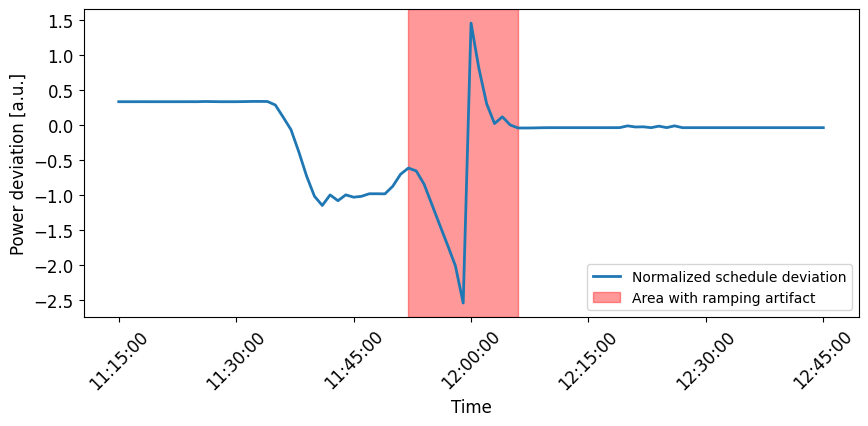

In [76]:
from typing import List

start_time = '2022-07-29 11:15:00+02:00'
end_time = '2022-07-29 12:45:00+02:00'

label_list = real_data_df.set_index('Datetime').loc[start_time : end_time].index.to_list()
# only get labels for every 15 min
quarter_labels = label_list[0::15]
# remove day and time zone
quarter_time_labels = list(map(lambda each : each[11:-6], quarter_labels))

fig, ax = plt.subplots(figsize=(10,4))

x_ticks_positions = np.arange(real_data_df.set_index('Datetime').loc[start_time : end_time].shape[0], step=15)
x_ticks_labels = quarter_time_labels

ax.plot(np.arange(0, len(real_data_df.set_index('Datetime').loc[start_time : end_time])),real_data_df.set_index('Datetime').loc[start_time : end_time], linewidth=2.0, label="Normalized schedule deviation")
# changing the fontsize of yticks

plt.yticks(fontsize=12)

ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels, fontsize=12, rotation=45)
plt.xlabel("Time", fontsize=12)

ax.axvspan(37, 51, alpha=0.4, color='red', label='Area with ramping artifact')

plt.ylabel("Power deviation [a.u.]", fontsize=12)
plt.legend(loc=4)

plt.show()

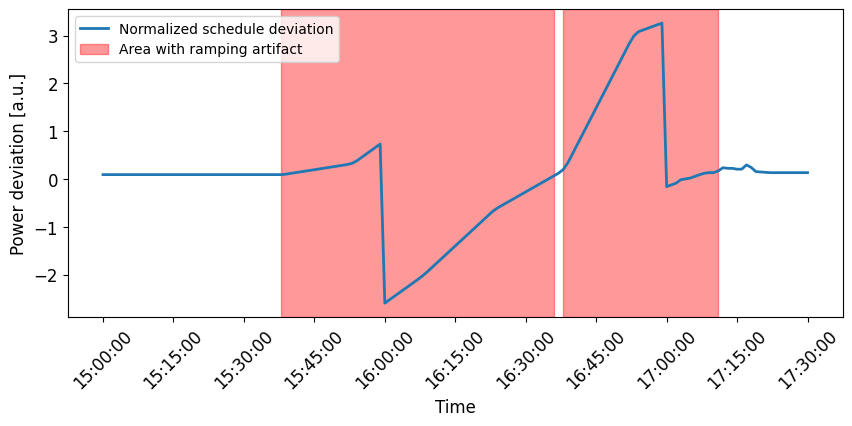

In [80]:
from typing import List
import matplotlib.patches as patches

start_time = '2022-08-02 15:00:00+02:00'
end_time = '2022-08-02 17:30:00+02:00'

artifact1_start = '15:45:00'
artifact1_end = '16:15:00'

x = np.arange(0, len(real_data_df.set_index('Datetime').loc[start_time : end_time]))
y = real_data_df.set_index('Datetime').loc[start_time : end_time]

label_list = real_data_df.set_index('Datetime').loc[start_time : end_time].index.to_list()
# only get labels for every 15 min
quarter_labels = label_list[0::15]
# remove day and time zone
quarter_time_labels = list(map(lambda each : each[11:-6], quarter_labels))

fig, ax = plt.subplots(figsize=(10,4))

x_ticks_positions = np.arange(real_data_df.set_index('Datetime').loc[start_time : end_time].shape[0], step=15)
x_ticks_labels = quarter_time_labels

ax.plot(x, y, linewidth=2.0, label="Normalized schedule deviation")

# changing the fontsize of yticks
plt.yticks(fontsize=12)

ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels, fontsize=12, rotation=45)
plt.xlabel("Time", fontsize=12)

ax.axvspan(38, 96, alpha=0.4, color='red', label='Area with ramping artifact')
ax.axvspan(98, 131, alpha=0.4, color='red')

plt.ylabel("Power deviation [a.u.]", fontsize=12)

plt.legend()

plt.show()

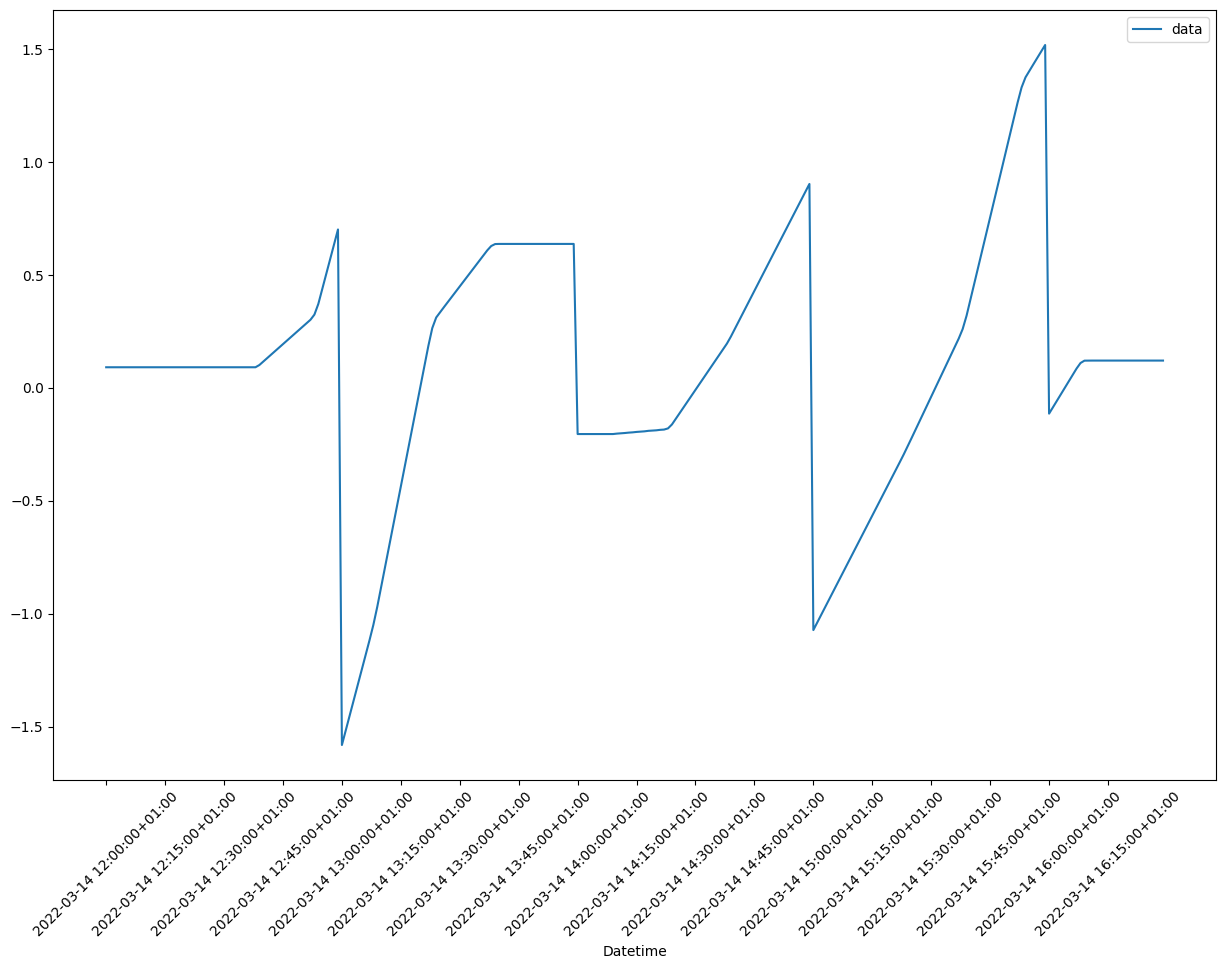

In [29]:
plot = real_data_df.set_index('Datetime').iloc[104400 : 104670].plot(figsize=(15,10), 
                                                                    rot=45, 
                                                                    xticks=np.arange(real_data_df.set_index('Datetime').iloc[104400 : 104670].shape[0], step=15)
                                                                    )

In [24]:
real_data_df = real_data_df.iloc[104400 : 104670]

# Convert 'Datetime' to datetime if not already done
real_data_df['Datetime'] = pd.to_datetime(real_data_df['Datetime'])

# Set 'Datetime' as the index
real_data_df.set_index('Datetime', inplace=True)

In [19]:
real_data_df

,data
Datetime,
2022-03-14 12:00:00+01:00,0.091805
2022-03-14 12:01:00+01:00,0.091805
2022-03-14 12:02:00+01:00,0.091806
2022-03-14 12:03:00+01:00,0.091806
2022-03-14 12:04:00+01:00,0.091806
...,...
2022-03-14 16:25:00+01:00,0.121418
2022-03-14 16:26:00+01:00,0.121418
2022-03-14 16:27:00+01:00,0.121418


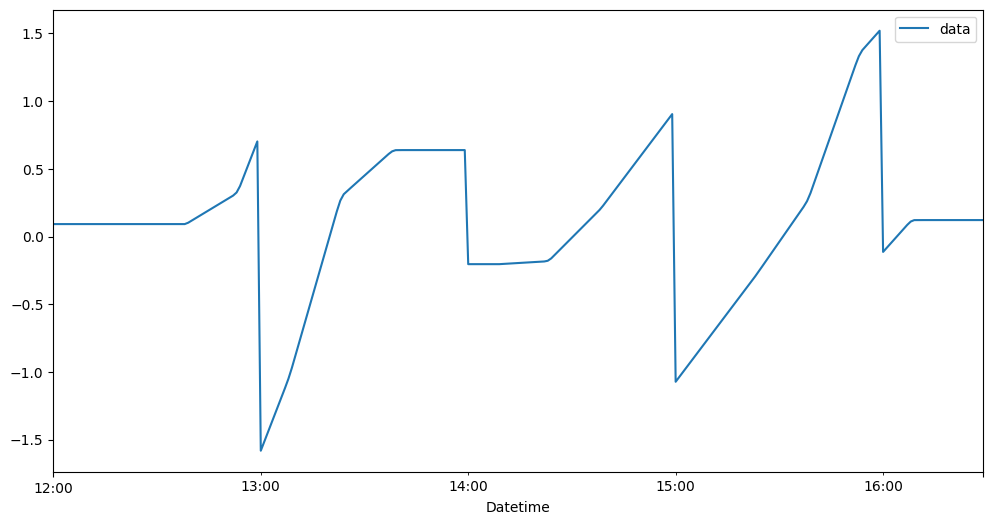

In [25]:
# Plot the data
real_data_df.plot(y='data', kind='line', figsize=(12,  6))

# # Format the x-axis to make the dates readable
# plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: 104400    2022-03-14 12:00:00+01:00
104401    2022-03-14 12:01:00+01:00
104402    2022-03-14 12:02:00+01:00
104403    2022-03-14 12:03:00+01:00
104404    2022-03-14 12:04:00+01:00
                    ...            
104665    2022-03-14 16:25:00+01:00
104666    2022-03-14 16:26:00+01:00
104667    2022-03-14 16:27:00+01:00
104668    2022-03-14 16:28:00+01:00
104669    2022-03-14 16:29:00+01:00
Name: Datetime, Length: 270, dtype: object

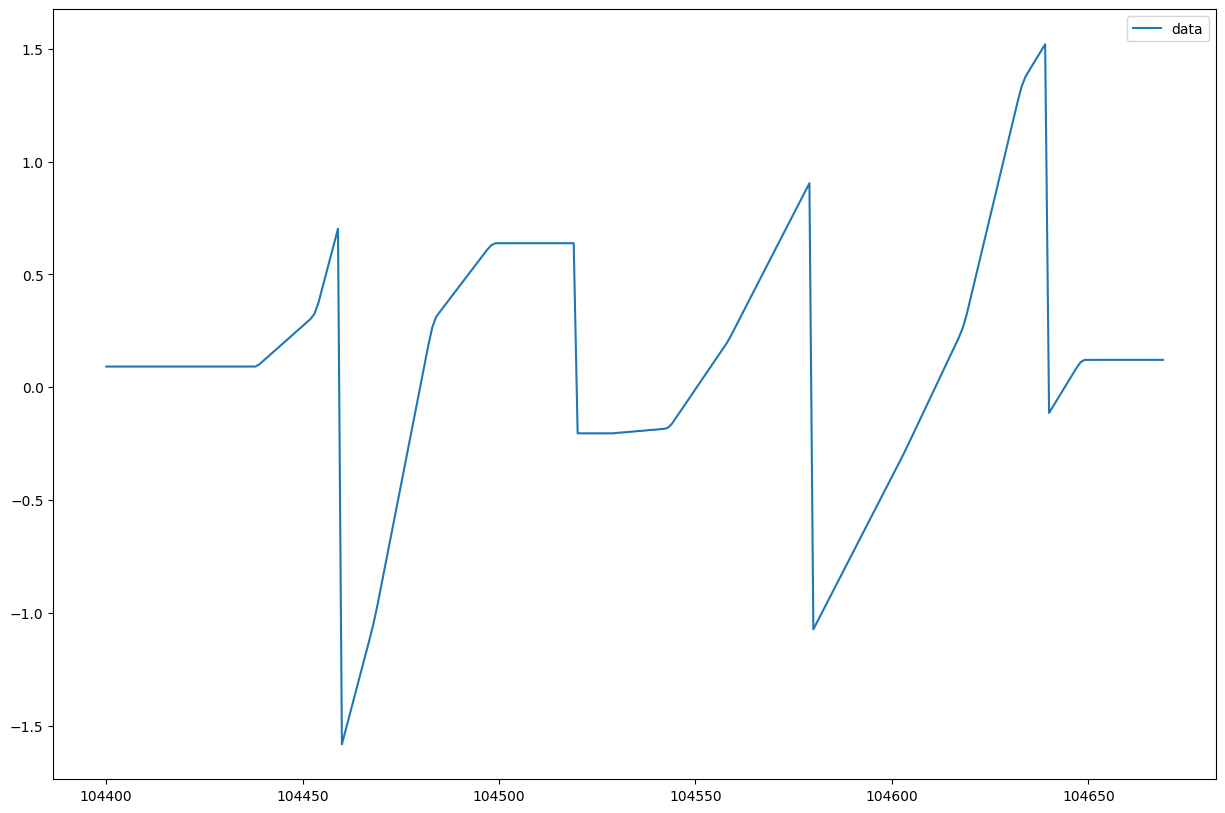

In [10]:
plot = real_data_df.iloc[104400:104670].plot(figsize=(15,10), 
                                              rot=45,
                                              xlabel=real_data_df.iloc[104400 : 104670]['Datetime']
                                              xticks=real_data_df.iloc[104400 : 104670]['Datetime']
                                              )

Plot dataset on 
- August 2nd 2022; Known artifacts starting at 15:30 and 17:30
- July 29th from 11:00 to 15:00. Known artifacts starting at 11:30 and 12:30 (? - maybe rather 14:00)


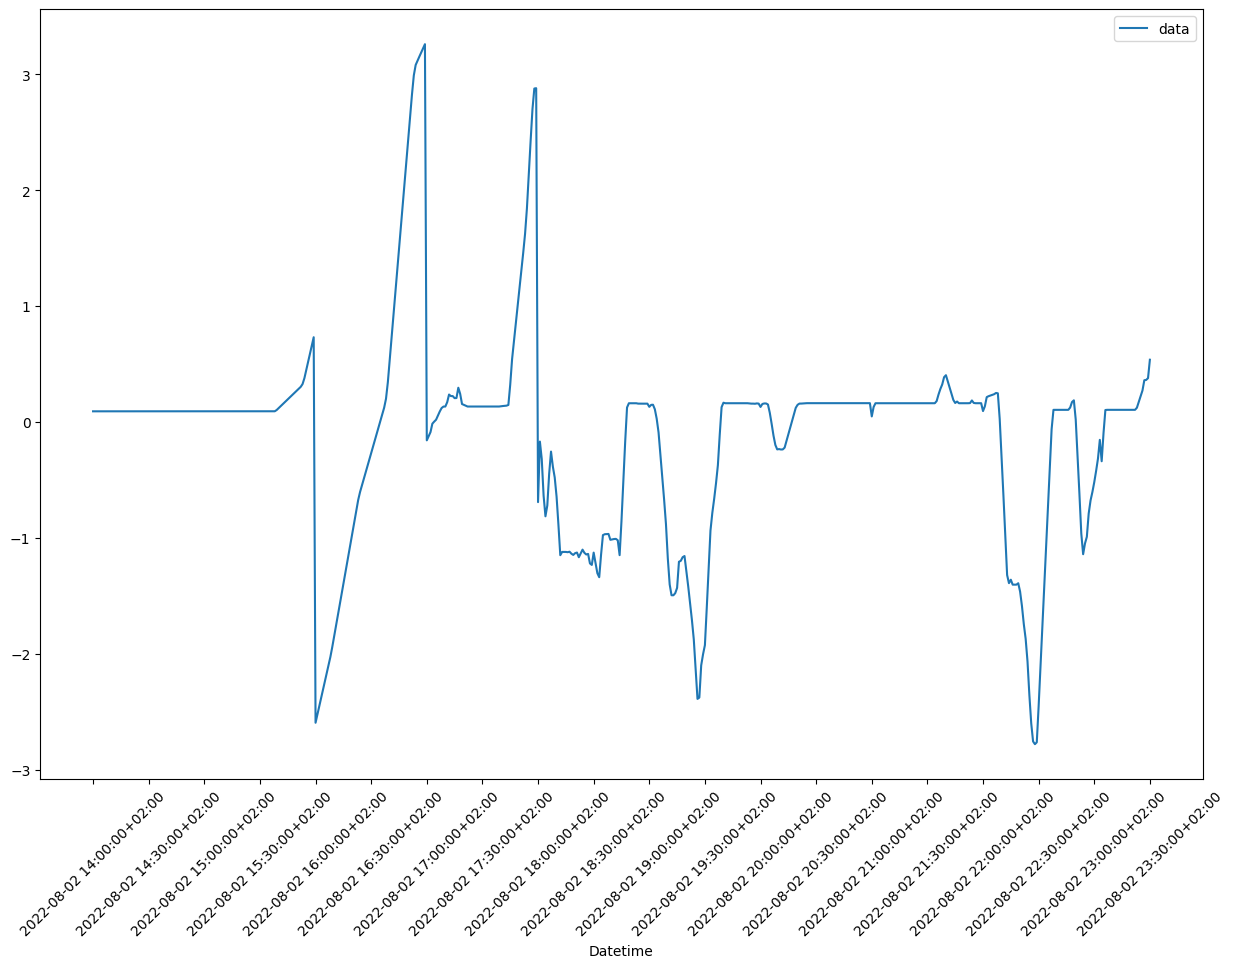

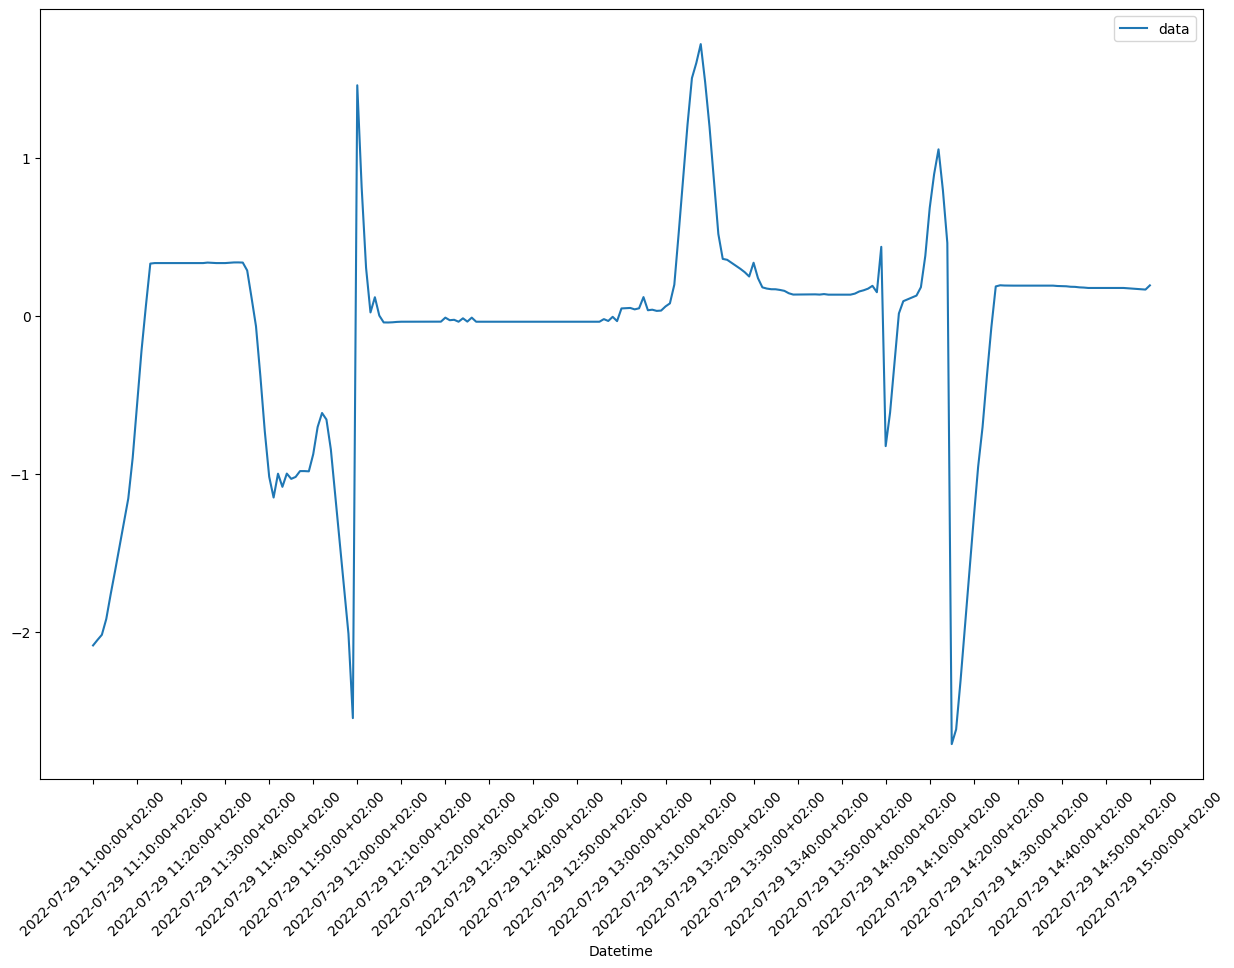

In [5]:
plot = real_data_df.set_index('Datetime').loc['2022-08-02 14:00:00+02:00' : '2022-08-02 23:30:00+02:00'].plot(figsize=(15,10), 
                                                                                                              rot=45, 
                                                                                                              xticks=np.arange(real_data_df.set_index('Datetime').loc['2022-08-02 14:00:00+02:00' : '2022-08-02 23:30:00+02:00'].shape[0], step=30)
                                                                                                              )
plot2 = real_data_df.set_index('Datetime').loc['2022-07-29 11:00:00+02:00' : '2022-07-29 15:00:00+02:00'].plot(figsize=(15,10), 
                                                                                                               rot=45,
                                                                                                               xticks=np.arange(real_data_df.set_index('Datetime').loc['2022-07-29 11:00:00+02:00' : '2022-07-29 15:00:00+02:00'].shape[0], step=10)
                                                                                                               )

In [9]:
dataset = [real_data_df["data"].values.tolist()]

In [10]:
np.max(dataset)

12.352986846202697

In [11]:
def save(data: np.ndarray,
         to: str):
    assert isinstance(data, list)
    assert isinstance(data[0], list)
    assert isinstance(data[0][0], float)
    with open(to, "wb") as f:
        pickle.dump(data, f)

In [75]:
save(dataset,
     f"../data/processed/{dataset_name}_TEST.pickle")

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('artifactory/')

In [6]:
from data import CachedArtifactDataset
from pathlib import Path

val_path = Path("//corp.transmission-it.de/user/home05/FK4467/Profile/Documents/artifactory-master/artifactory-master/data/francois/francois_normalized_dataset.pickle")
val = CachedArtifactDataset(file=val_path)

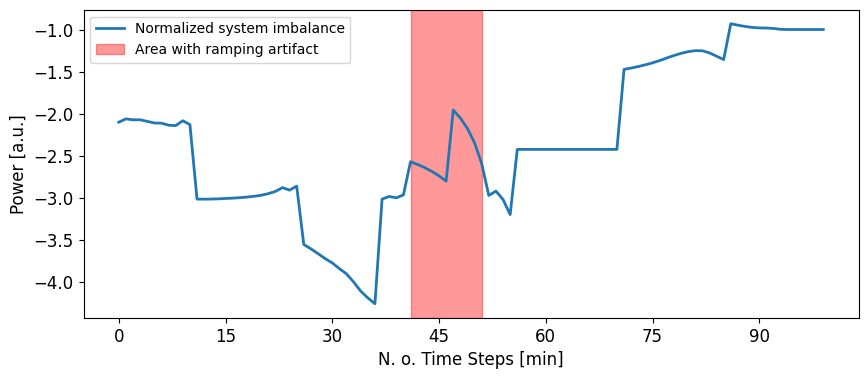

In [22]:
from typing import List
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt

index = 0

data = val[index]["data"]
x = data[210:310]

label_list = np.arange(len(x), step=15)

fig, ax = plt.subplots(figsize=(10,4))

x_ticks_positions = np.arange(len(x), step=15)
x_ticks_labels = label_list

ax.plot(x, linewidth=2.0, label="Normalized system imbalance")

# changing the fontsize of yticks
plt.yticks(fontsize=12)

ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels, fontsize=12)
plt.xlabel("N. o. Time Steps [min]", fontsize=12)

ax.axvspan(41, 51, alpha=0.4, color='red', label='Area with ramping artifact')

plt.ylabel("Power [a.u.]", fontsize=12)

plt.legend()

plt.show()

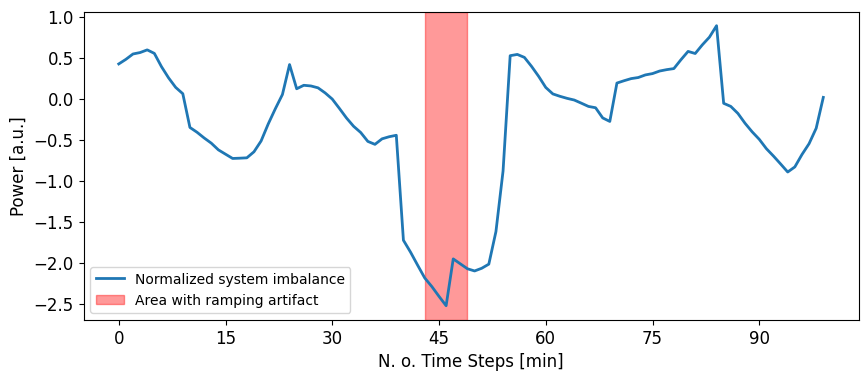

In [25]:
index = 1

data = val[index]["data"]
x = data[210:310]

label_list = np.arange(len(x), step=15)

fig, ax = plt.subplots(figsize=(10,4))

x_ticks_positions = np.arange(len(x), step=15)
x_ticks_labels = label_list

ax.plot(x, linewidth=2.0, label="Normalized system imbalance")

# changing the fontsize of yticks
plt.yticks(fontsize=12)

ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels, fontsize=12)
plt.xlabel("N. o. Time Steps [min]", fontsize=12)

ax.axvspan(43, 49, alpha=0.4, color='red', label='Area with ramping artifact')

plt.ylabel("Power [a.u.]", fontsize=12)

plt.legend()

plt.show()